In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
full_flu_train = pd.read_csv('data/numeric_train')
flu_test_cln = pd.read_csv('data/numeric_test')

full_onehot_train = pd.read_csv('data/onehot_train')
full_onehot_test = pd.read_csv('data/onehot_test')

In [11]:
full_flu_train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

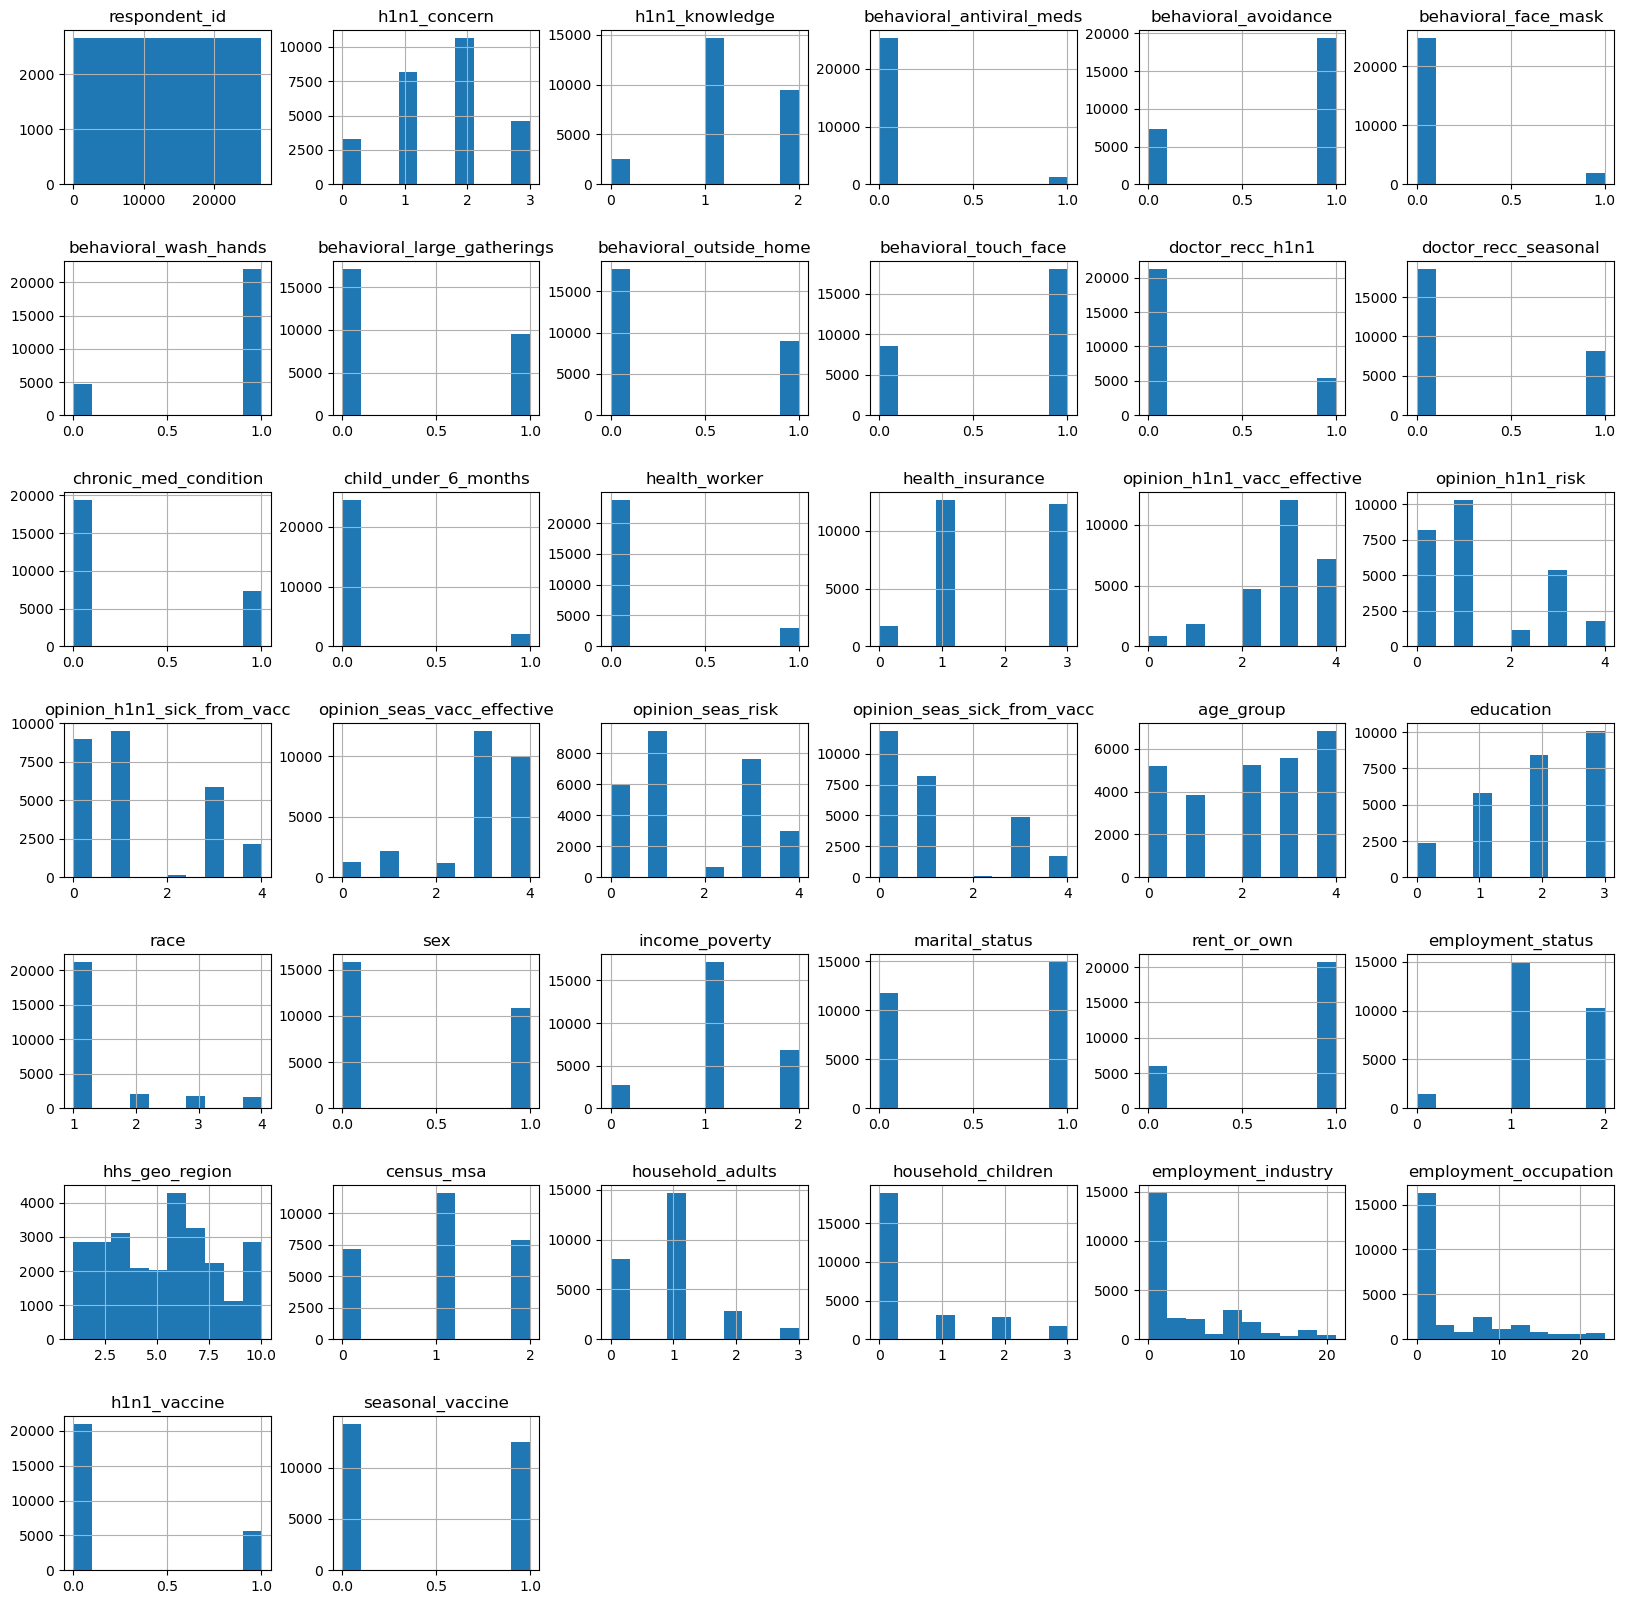

In [12]:
full_flu_train.hist(figsize=(20,20))
plt.subplots_adjust(hspace=0.5)
plt.show()

In [13]:
full_flu_train.corr()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,1.000000,0.017896,0.003473,-0.008458,0.008912,-0.006654,0.011212,0.004455,0.009181,0.007606,...,0.007372,0.005587,0.002234,-0.000294,0.000172,-0.003650,-0.007974,0.001864,-0.003280,-0.004652
h1n1_concern,0.017896,1.000000,0.060828,0.089866,0.229648,0.155757,0.291670,0.254133,0.245404,0.245038,...,-0.000714,0.022347,0.036768,-0.007178,-0.016079,0.049441,-0.053141,-0.039958,0.121574,0.154488
h1n1_knowledge,0.003473,0.060828,1.000000,-0.010450,0.087194,0.029888,0.089690,-0.047293,-0.066479,0.084633,...,0.108313,-0.065283,-0.068010,0.035243,0.023866,0.053378,0.126464,0.099238,0.117771,0.119779
behavioral_antiviral_meds,-0.008458,0.089866,-0.010450,1.000000,0.048533,0.145772,0.063996,0.106314,0.127204,0.069982,...,-0.056575,-0.026549,0.035863,0.012411,0.044829,0.083090,-0.009061,0.002058,0.040226,0.006013
behavioral_avoidance,0.008912,0.229648,0.087194,0.048533,1.000000,0.064155,0.334974,0.225402,0.217599,0.329796,...,0.028909,0.007008,0.008829,0.004631,0.017995,0.038977,-0.010192,-0.021396,0.046837,0.076130
behavioral_face_mask,-0.006654,0.155757,0.029888,0.145772,0.064155,1.000000,0.083229,0.180377,0.162964,0.103603,...,-0.043492,0.019287,0.025173,0.021285,0.014191,0.004794,-0.024128,-0.002656,0.070413,0.050020
behavioral_wash_hands,0.011212,0.291670,0.089690,0.063996,0.334974,0.083229,1.000000,0.194750,0.191804,0.362979,...,0.017509,0.018124,0.007713,-0.000532,0.009367,0.047451,-0.012349,-0.010216,0.074570,0.112254
behavioral_large_gatherings,0.004455,0.254133,-0.047293,0.106314,0.225402,0.180377,0.194750,1.000000,0.580881,0.251383,...,-0.047477,0.091349,0.046391,-0.042894,-0.030994,-0.009126,-0.107428,-0.085100,0.018089,0.063722
behavioral_outside_home,0.009181,0.245404,-0.066479,0.127204,0.217599,0.162964,0.191804,0.580881,1.000000,0.265401,...,-0.063544,0.086734,0.053288,-0.032730,-0.026542,-0.008937,-0.121603,-0.096205,0.022080,0.053287
behavioral_touch_face,0.007606,0.245038,0.084633,0.069982,0.329796,0.103603,0.362979,0.251383,0.265401,1.000000,...,0.017302,0.025622,0.006820,-0.021698,-0.001233,0.023739,-0.033301,-0.017891,0.070855,0.119925


## Normalized Value Counts for Columns:

In [14]:
for c in full_onehot_train.columns:
    if c != 'respondent_id':
        print(full_onehot_train[c].value_counts(normalize=True))
        print("                        ")

2.0    0.399408
1.0    0.305276
3.0    0.171902
0.0    0.123413
Name: h1n1_concern, dtype: float64
                        
1.0    0.550942
2.0    0.355225
0.0    0.093833
Name: h1n1_knowledge, dtype: float64
                        
0.0    0.951286
1.0    0.048714
Name: behavioral_antiviral_meds, dtype: float64
                        
1.0    0.727749
0.0    0.272251
Name: behavioral_avoidance, dtype: float64
                        
0.0    0.931067
1.0    0.068933
Name: behavioral_face_mask, dtype: float64
                        
1.0    0.825888
0.0    0.174112
Name: behavioral_wash_hands, dtype: float64
                        
0.0    0.642528
1.0    0.357472
Name: behavioral_large_gatherings, dtype: float64
                        
0.0    0.663721
1.0    0.336279
Name: behavioral_outside_home, dtype: float64
                        
1.0    0.678811
0.0    0.321189
Name: behavioral_touch_face, dtype: float64
                        
0.0    0.797506
1.0    0.202494
Name: doctor_recc

## Extracting Ordinal and Binary Data:

In [15]:
binary_df = full_flu_train[[
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'sex', 'marital_status',
       'rent_or_own', 'h1n1_vaccine', 'seasonal_vaccine']]

ordinal_df = full_flu_train[[ 'h1n1_concern', 'h1n1_knowledge',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'income_poverty', 
    'employment_status', 'census_msa',
       'household_adults', 'household_children', 
       'h1n1_vaccine', 'seasonal_vaccine']]

## Binary Data Heatmap:

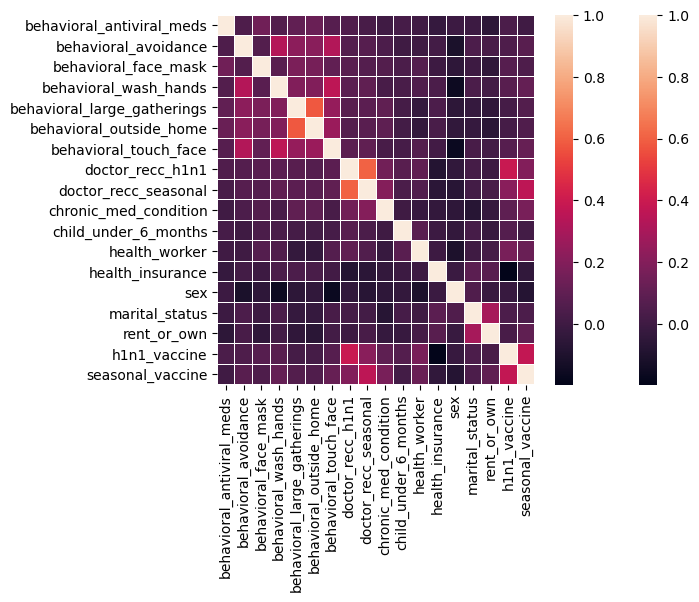

In [17]:
sns.heatmap(binary_df.corr(), linewidth=.01)
plt.show();

## Ordinal Data Heatmap:

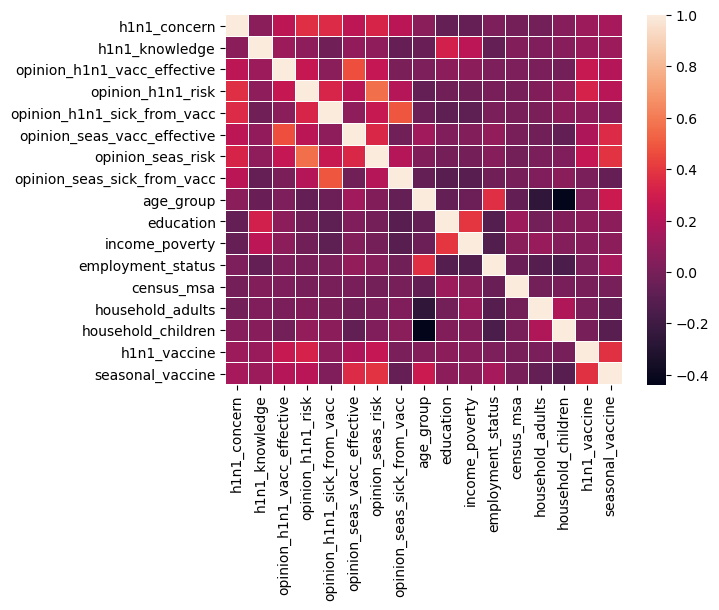

In [18]:
sns.heatmap(ordinal_df.corr(), linewidth=.01)
plt.show();

## Age Group vs Number of Children in Household:

In [19]:
stats.pearsonr(full_flu_train.household_children, full_flu_train.age_group)

(-0.43766753440661976, 0.0)

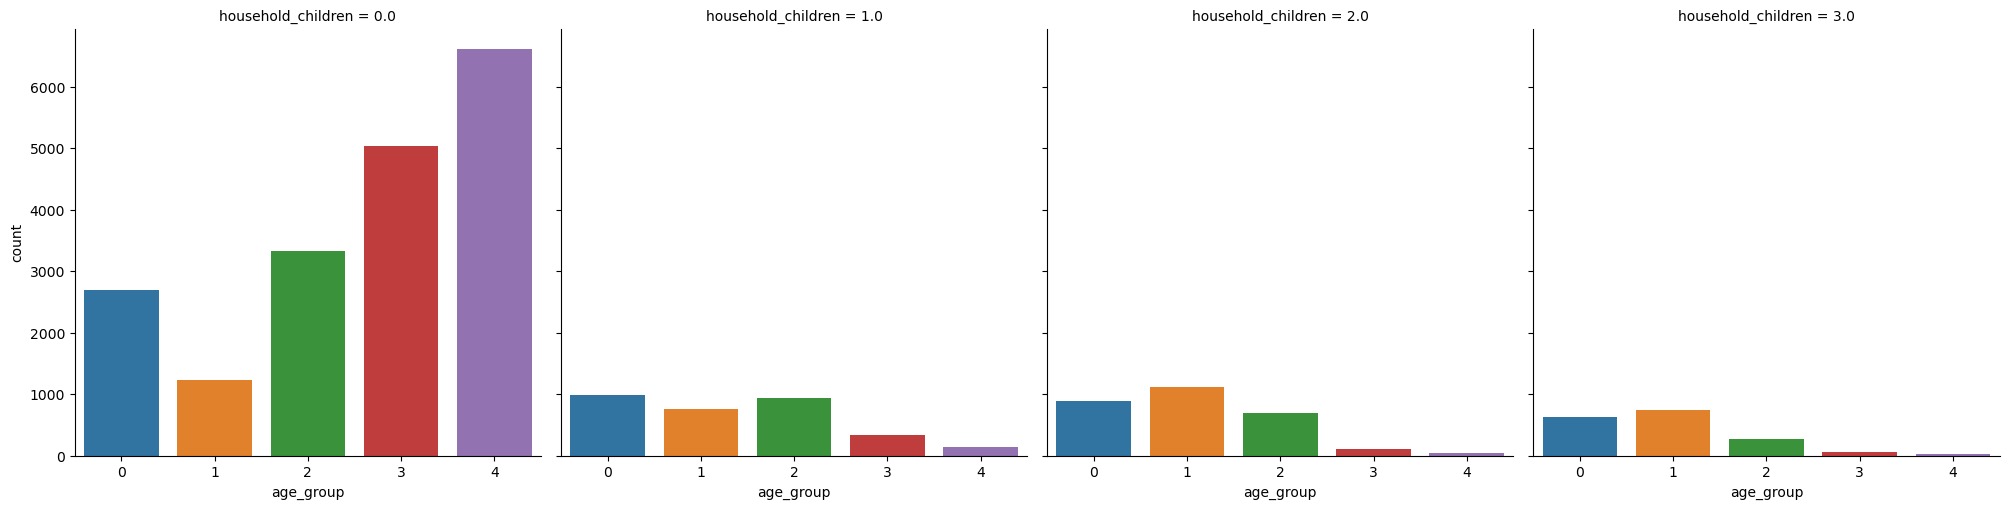

In [20]:
sns.catplot(x='age_group', col='household_children', data=full_flu_train, kind='count')
plt.show();

## Reducing Time Out of Home vs Reducing Time at Large Gatherings:

In [21]:
stats.pearsonr(full_flu_train.behavioral_outside_home, full_flu_train.behavioral_large_gatherings)

(0.5808811017594829, 0.0)

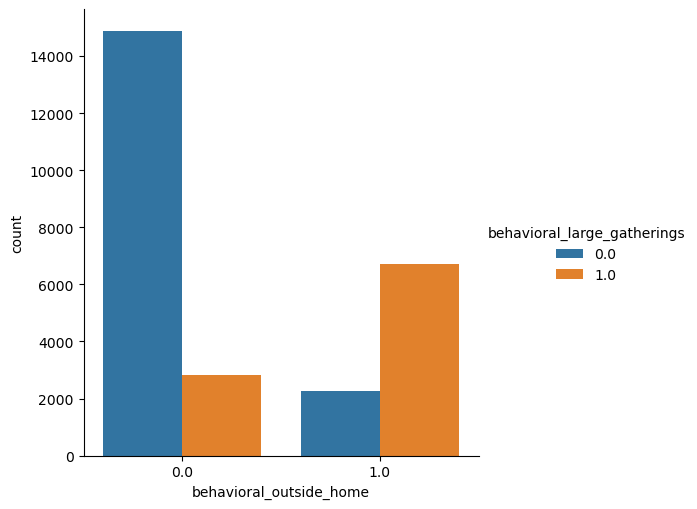

In [22]:
sns.catplot(x='behavioral_outside_home', hue='behavioral_large_gatherings', data=full_flu_train, kind='count')
plt.show();

## Opinion of Seasonal Risk vs Opinion of H1N1 Risk:

In [23]:
stats.pearsonr(full_flu_train.opinion_seas_risk, full_flu_train.opinion_h1n1_risk)

(0.5629763589616432, 0.0)

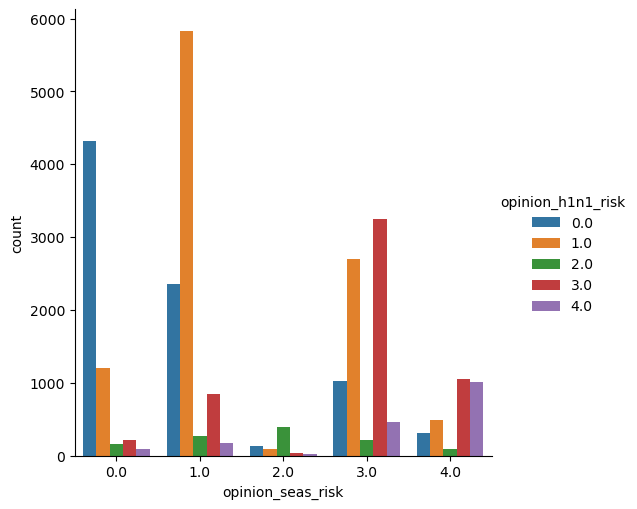

In [24]:
sns.catplot(x='opinion_seas_risk', hue='opinion_h1n1_risk', data=full_flu_train, kind='count')
plt.show();

## Opinion on Effectiveness and Seasonal Vaccination:

In [16]:
stats.pearsonr(full_flu_train.seasonal_vaccine, full_flu_train.opinion_seas_vacc_effective)

(0.35886878525139454, 0.0)

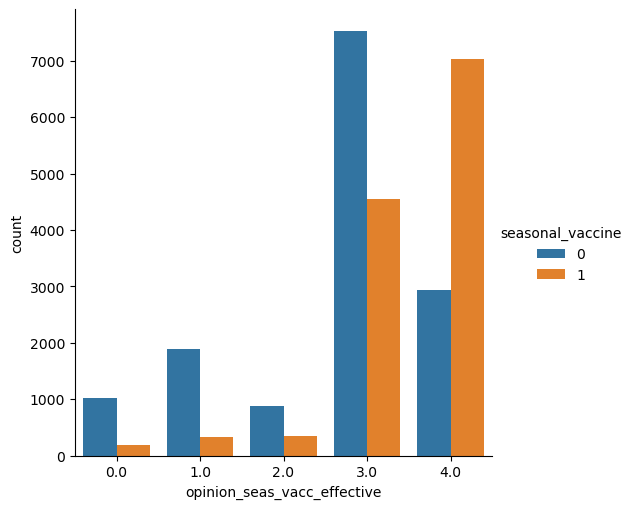

In [25]:
sns.catplot(x='opinion_seas_vacc_effective', hue='seasonal_vaccine', data=full_flu_train, kind='count')
plt.show();

## Age Group and Seasonal Vaccination:

In [18]:
stats.pearsonr(full_flu_train.seasonal_vaccine, full_flu_train.age_group)

(0.2774542068602136, 0.0)

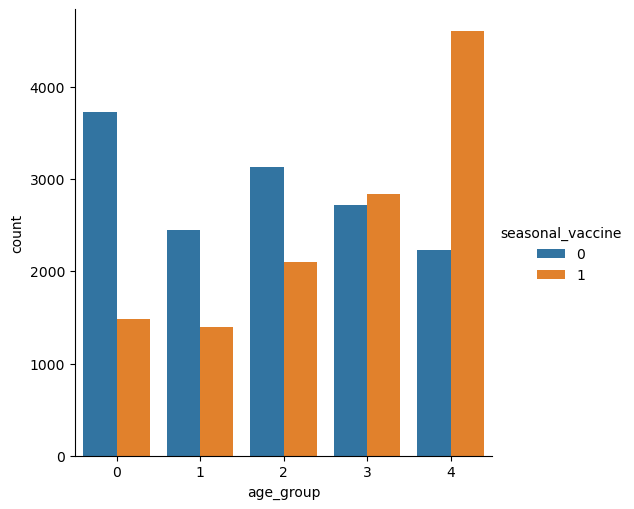

In [26]:
sns.catplot(x="age_group",hue='seasonal_vaccine',
                data=full_flu_train, kind="count")
plt.show();

## Opinion of Seasonal Risk vs Seasonal Vaccination:

In [20]:
stats.pearsonr(full_flu_train.seasonal_vaccine, full_flu_train.opinion_seas_risk)

(0.38691570331520153, 0.0)

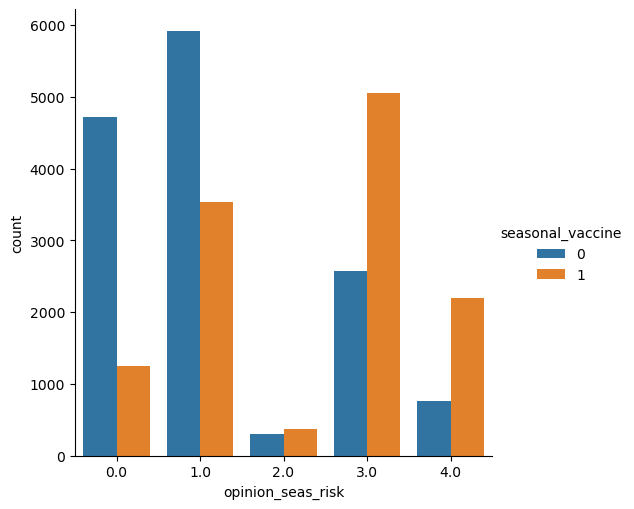

In [27]:
sns.catplot(x="opinion_seas_risk",hue='seasonal_vaccine',
                data=full_flu_train, kind="count")
plt.show();

## H1N1 Risk Opinions vs Seasonal Flu Risk Opinion:

In [22]:
stats.pearsonr(full_flu_train.opinion_h1n1_risk, full_flu_train.opinion_seas_risk)

(0.5629763589616432, 0.0)

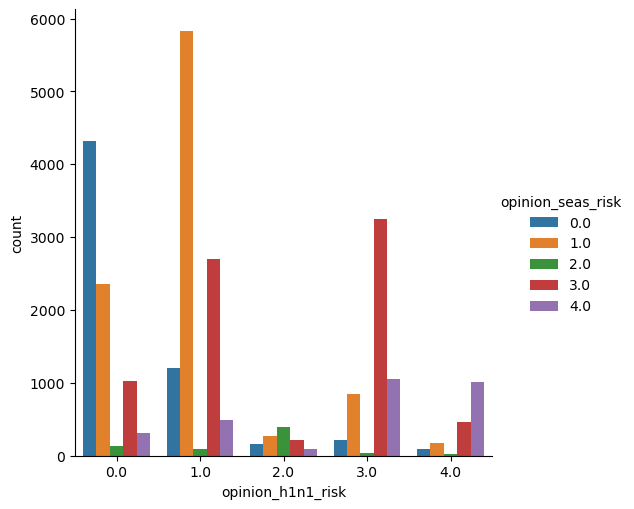

In [28]:
sns.catplot(x="opinion_h1n1_risk",hue='opinion_seas_risk',
                data=full_flu_train, kind="count")
plt.show();

## Dr Reccomendation and Seasonal Vaccination:

In [24]:
stats.pearsonr(full_flu_train.seasonal_vaccine, full_flu_train.doctor_recc_seasonal)

(0.36069588759186316, 0.0)

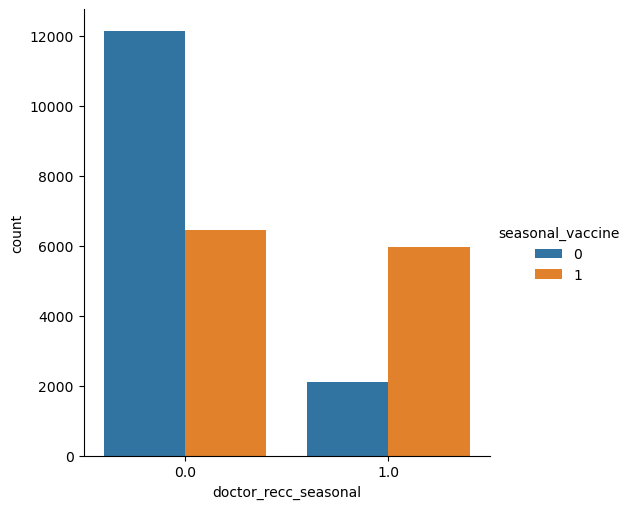

In [29]:
sns.catplot(x="doctor_recc_seasonal",hue='seasonal_vaccine',
                data=full_flu_train, kind="count")
plt.show();

## Dr Reccomendation and H1N1 Vaccination:

In [26]:
stats.pearsonr(full_flu_train.h1n1_vaccine, full_flu_train.doctor_recc_h1n1)

(0.39408570665048137, 0.0)

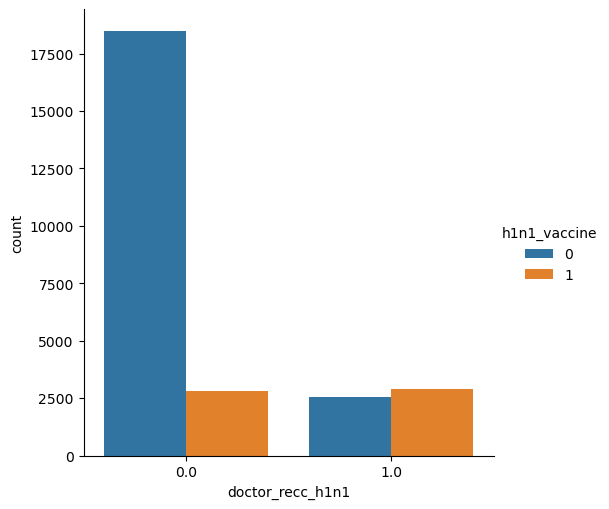

In [30]:
sns.catplot(x="doctor_recc_h1n1",hue='h1n1_vaccine',
                data=full_flu_train, kind="count")
plt.show();

## H1N1 Vaccincation and Seasonal Vaccination:

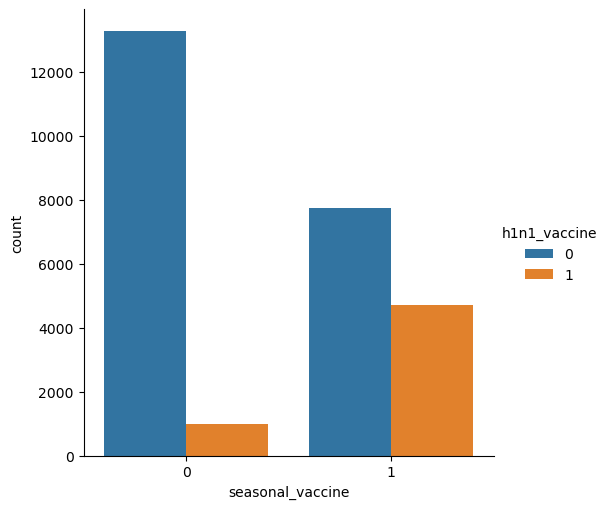

In [31]:
sns.catplot(x='seasonal_vaccine', hue='h1n1_vaccine', data=full_flu_train, kind='count')
plt.show();

# Conclusion:
From initial exploration of the data, it seems there are no extremely strong correlations between any 2 independent variables and there are only minor correlations between independent variables and response variables. Some variables to keep an eye on moving forward are the presence of Dr recommendations, beliefs about risks/effectiveness of vaccines and age group's effect on vaccination rates.

Some conclusions can be drawn about the demographics of the population being sampled. This sample is predominantly white, female, educated and above the poverty line. The large majority have no children in their household and limited contact with children under 6 months of age.

I have decided to keep all columns regardless of correlations to make machine learning as robust as possible. If ML shows some columns to be redundant or not useful I will remove them in order to make the predicitons as efficient as possible. 